In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels
from spinexchange import SpinExChannels

In [13]:
k_A  = np.linspace(1e-4, 4*constants.hcInEVAngstrom, 200)
k_eV = k_A / constants.hcInEVAngstrom

r0       = 1e-9
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos     = np.linspace(r0, intlimit, 100)

muT = constants.TritiumConstants.mu

even_ls = np.arange(0, 16, 2)  

def total_sigma_for_potential(pot_obj, k_grid_A, rhos, mu, integrator='Radau'):
    sigma_total = np.zeros_like(k_grid_A, dtype=float)
    for l in even_ls:
        sigma_l = np.array([
            elastic.GetCrossSection(rhos, k, l, mu, pot_obj, integrator)
            for k in k_grid_A
        ])
        sigma_total += sigma_l
    return sigma_total
base_key       = "Silvera"                             
base_potential = potentials.Triplets[base_key]

sigmaT_raw   = {}
sigmaT_ratio = {}

sigmaT_raw[base_key] = total_sigma_for_potential(base_potential, k_A, rhos, muT)

for pot_key, pot in potentials.Triplets.items():
    if pot_key == base_key:
        continue
    sigmaT_raw[pot_key] = total_sigma_for_potential(pot, k_A, rhos, muT)

for pot_key, sig in sigmaT_raw.items():
    sigmaT_ratio[pot_key] = sig / sigmaT_raw[base_key]



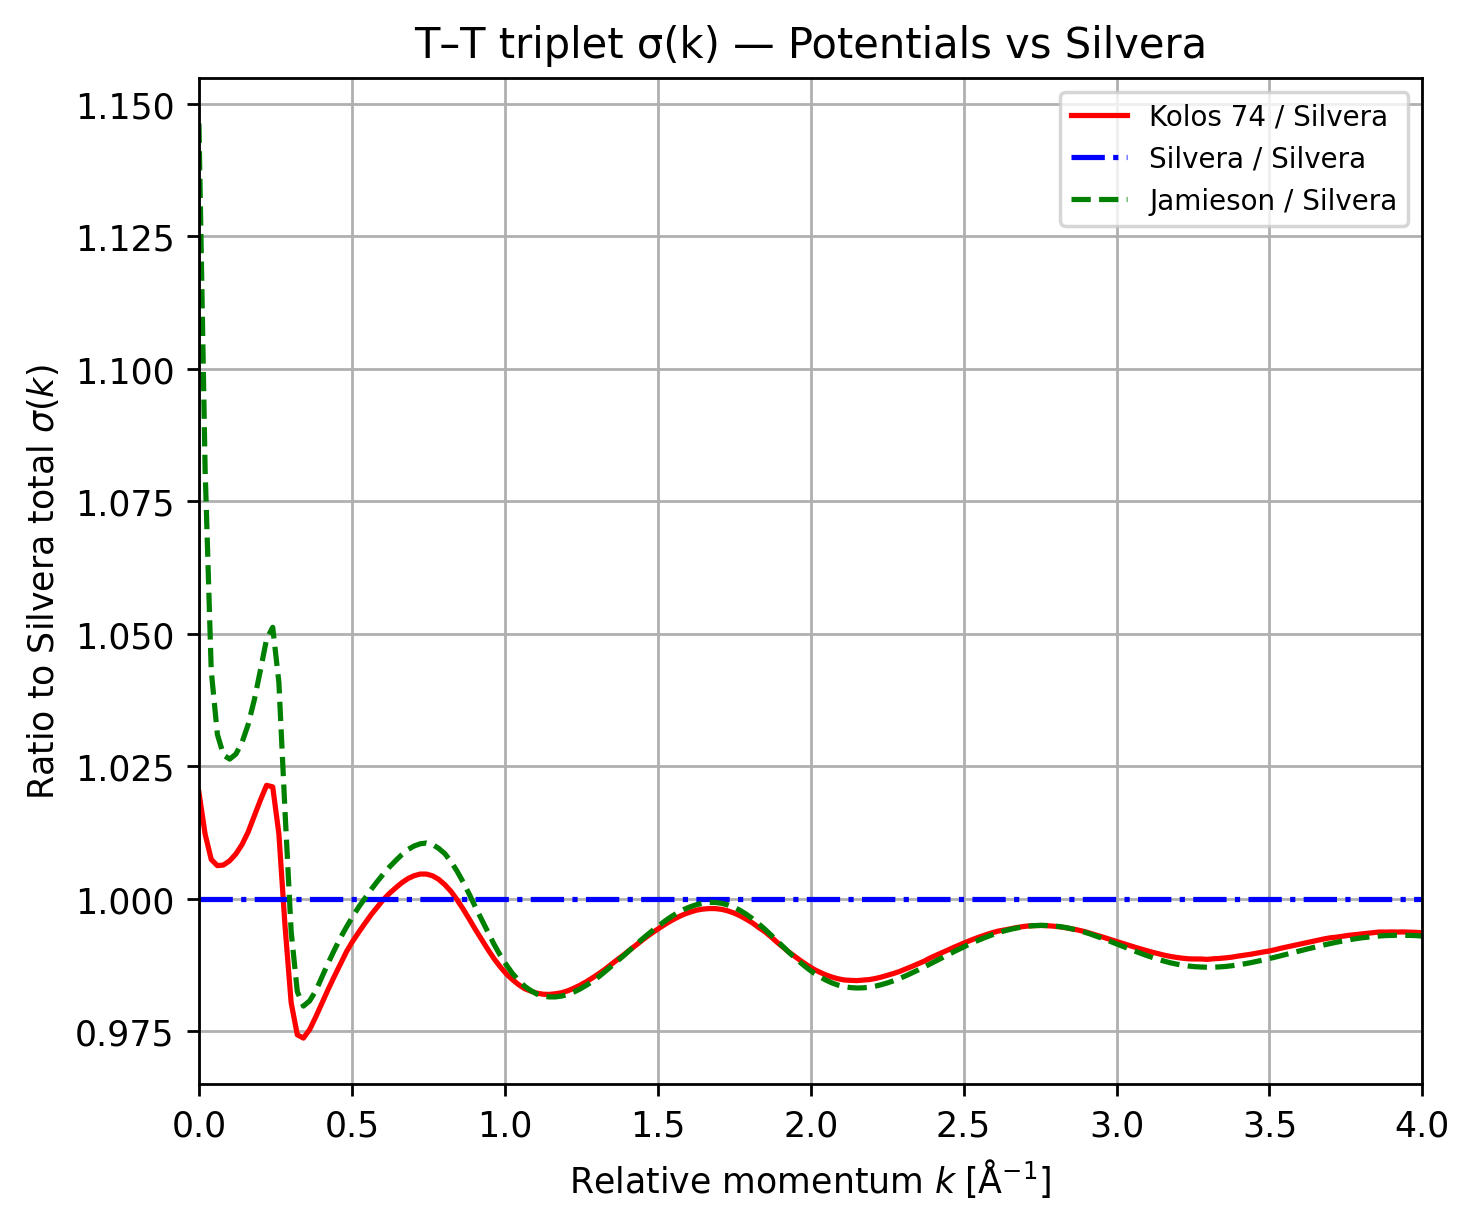

Kolos 74 / Silvera — mean ratio over k-grid: 0.9926
Silvera / Silvera — mean ratio over k-grid: 1.0000
Jamieson / Silvera — mean ratio over k-grid: 0.9957


In [14]:
colors    = ['red', 'blue', 'green', 'orange', 'dimgrey', 'purple', 'brown', 'teal']
linetypes = ['-', '-.', '--', ':']

plt.figure(figsize=(6,5), dpi=250)
for i, pot_key in enumerate(potentials.Triplets.keys()):
    sig_ratio = sigmaT_ratio[pot_key]
    plt.plot(
        k_eV,
        sig_ratio,
        linetypes[i % len(linetypes)],
        color=colors[i % len(colors)],
        label=f"{pot_key} / {base_key}"
    )

plt.xlabel(r'Relative momentum $k\;[\mathrm{\AA}^{-1}]$')
plt.ylabel(fr'Ratio to {base_key} total $\sigma(k)$')
plt.xlim(0, 4)
plt.title(f"T–T triplet σ(k) — Potentials vs {base_key}")
plt.grid(True, which='both')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("./Plots/TTElastic_total_ratio.png", dpi=250, bbox_inches='tight')
plt.show()

for pot_key in potentials.Triplets.keys():
    mean_ratio = float(np.mean(sigmaT_ratio[pot_key]))
    print(f"{pot_key} / {base_key} — mean ratio over k-grid: {mean_ratio:.4f}")


In [3]:
potT = potentials.Silvera_Triplet

B_values = np.logspace(-3, 1, 50)
T = 5e-4
rhos = np.linspace(1e-9, 0.75, 2000)

G_factors_rawDip = {}
G_factor_ratiosDip = {}

base_key = "Silvera"
base_potential = potentials.Triplets[base_key]


base_losses_by_channel = {}
for c in DipoleChannels:
    base_losses_by_channel[str(c)] = np.array([dipolelosses.GetGFactor(c, B, constants.TritiumConstants(), T, base_potential, rhos)for B in B_values])

for pot_key, pot in potentials.Triplets.items():
    G_factors_rawDip[pot_key] = {}
    G_factor_ratiosDip[pot_key] = {}

    for c in DipoleChannels:
        channel_str = str(c)
        losses = np.array([dipolelosses.GetGFactor(c, B, constants.TritiumConstants(), T, pot, rhos)for B in B_values])
        G_factors_rawDip[pot_key][channel_str] = losses
        G_factor_ratiosDip[pot_key][channel_str] = losses / base_losses_by_channel[channel_str]


/Users/tikitorch/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/tikitorch/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)



=== Kolos 74 / Silvera (Dipole) ===
Channel 1 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 1.0213
Channel 2 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 1.0192
Channel 3 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'd'}): mean ratio = 1.0192
Channel 4 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'c'}): mean ratio = 1.0091
Channel 5 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'd'}): mean ratio = 1.0074


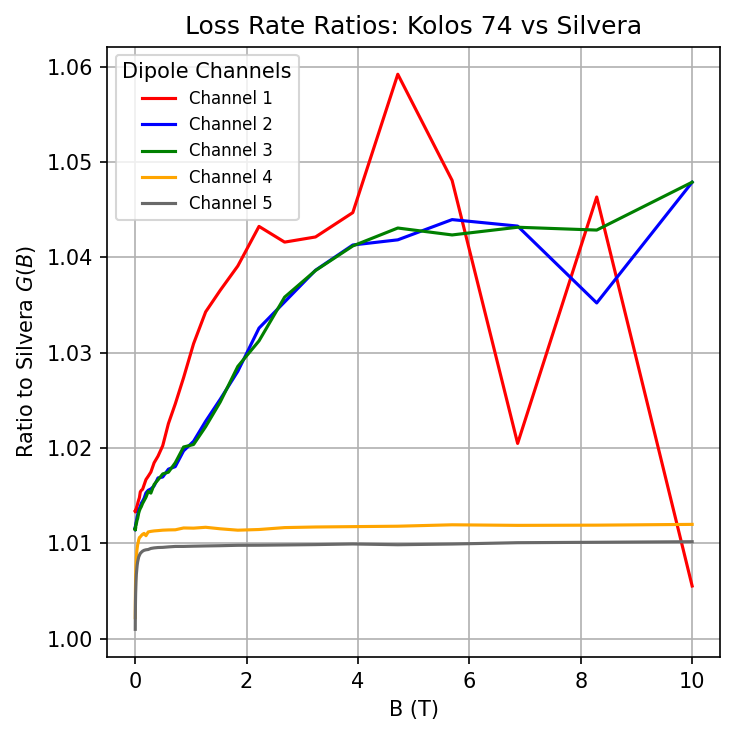


=== Silvera / Silvera (Dipole) ===
Channel 1 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 1.0000
Channel 2 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 1.0000
Channel 3 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'd'}): mean ratio = 1.0000
Channel 4 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'c'}): mean ratio = 1.0000
Channel 5 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'd'}): mean ratio = 1.0000


/var/folders/zl/6mjpyqs158s3ql94pwj2jgd40000gn/T/ipykernel_48401/142834290.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Dipole Channels", fontsize=8)


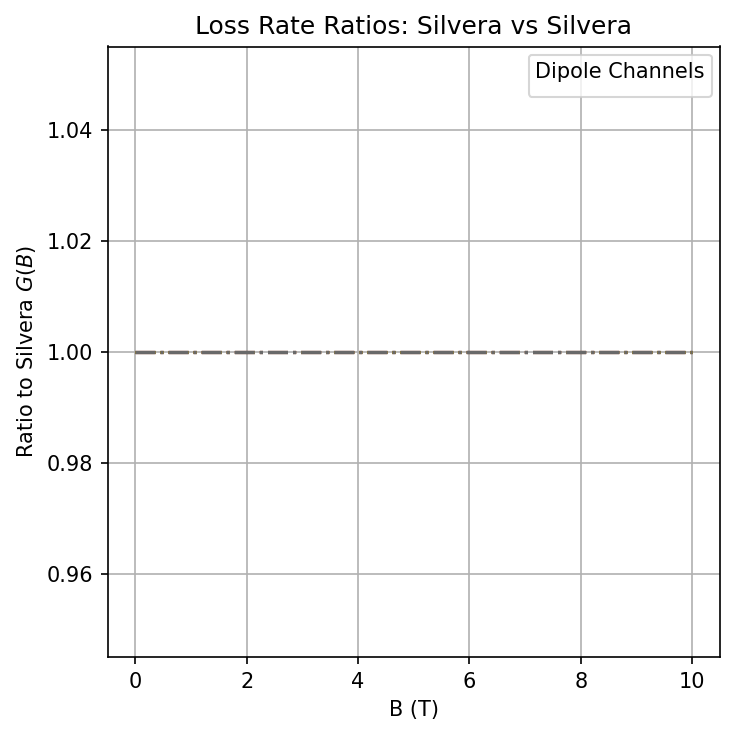


=== Jamieson / Silvera (Dipole) ===
Channel 1 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 1.1126
Channel 2 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 1.1051
Channel 3 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'd'}): mean ratio = 1.1044
Channel 4 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'c'}): mean ratio = 1.0628
Channel 5 ({'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'd'}): mean ratio = 1.0512


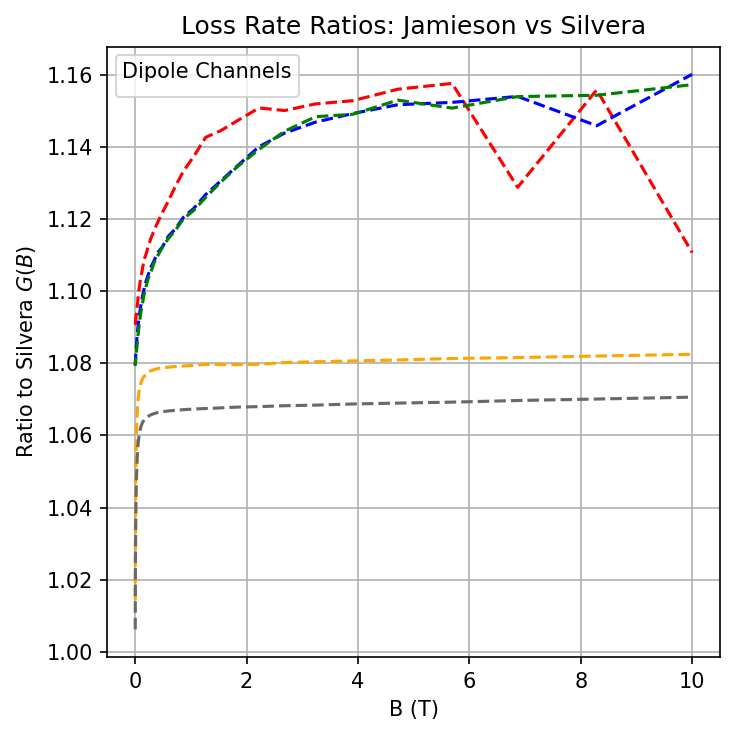

In [4]:
colors = ['red', 'blue', 'green', 'orange', 'dimgrey']
linetypes = ['-', '-.', '--', ':']

for pi, pot_key in enumerate(potentials.Triplets.keys()):
    print(f"\n=== {pot_key} / {base_key} (Dipole) ===")
    plt.figure(figsize=(5, 5), dpi=150)

    for ci, c in enumerate(DipoleChannels):
        channel_str = str(c)
        ratios = G_factor_ratiosDip[pot_key][channel_str]

        mean_ratio = np.mean(ratios)
        print(f"Channel {ci+1} ({channel_str}): mean ratio = {mean_ratio:.4f}")

        label = f"Channel {ci+1}" if pi == 0 else None  
        plt.plot(
            B_values,
            ratios,
            linetypes[pi % len(linetypes)],
            color=colors[ci % len(colors)],
            label=label
        )

    plt.xlabel("B (T)")
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Loss Rate Ratios: {pot_key} vs {base_key}")
    plt.grid(True, which='both')
    plt.legend(title="Dipole Channels", fontsize=8)
    plt.tight_layout()
    plt.show()



In [5]:
potS = potentials.Kolos_Singlet2_VDW

G_factors_raw_SETrip = {}
G_factor_ratios_SETrip = {}

base_key = "Silvera"
base_potential = potentials.Triplets[base_key]

base_losses_by_channel = {}
for c in SpinExChannels:
    channel_str = str(c)
    base_losses_by_channel[channel_str] = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, base_potential, potS, rhos)
        for B in B_values])

for pot_key, potT in potentials.Triplets.items():
    G_factors_raw_SETrip[pot_key] = {}
    G_factor_ratios_SETrip[pot_key] = {}

    for c in SpinExChannels:
        channel_str = str(c)
        losses = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, potS, rhos)
            for B in B_values])

        G_factors_raw_SETrip[pot_key][channel_str] = losses
        G_factor_ratios_SETrip[pot_key][channel_str] = losses / base_losses_by_channel[channel_str]



=== Kolos 74 / Silvera ===
Channel 1 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 0.9677
Channel 2 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 0.9814
Channel 3 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}): mean ratio = 0.9872


/var/folders/zl/6mjpyqs158s3ql94pwj2jgd40000gn/T/ipykernel_48401/1858701677.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="SpinEx Channels", fontsize=8)


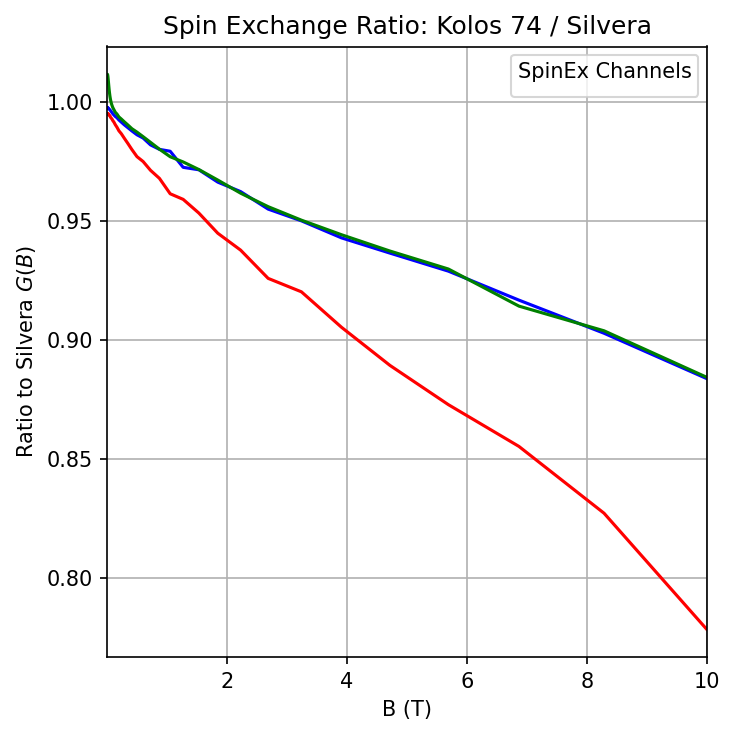


=== Jamieson / Silvera ===
Channel 1 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 0.9446
Channel 2 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 0.9623
Channel 3 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}): mean ratio = 0.9996


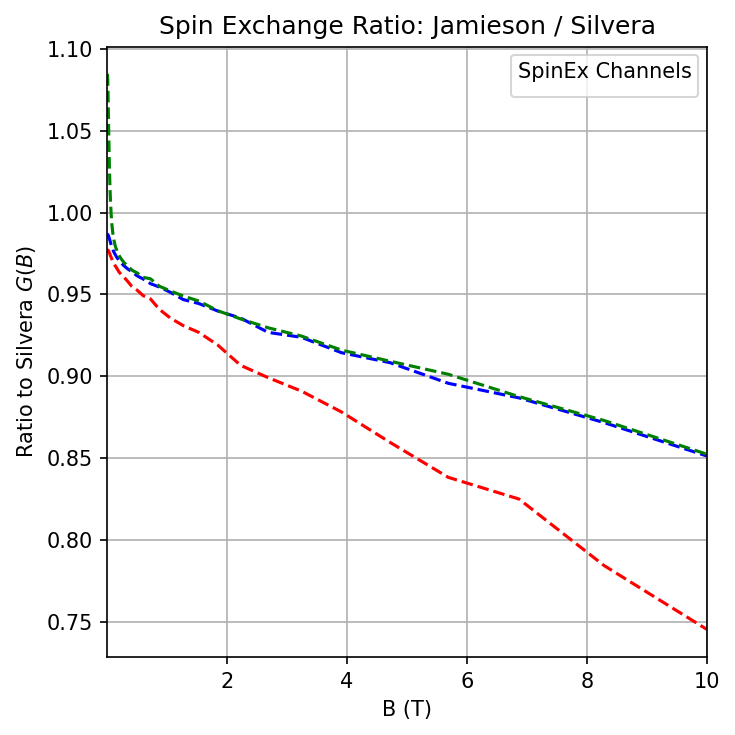

In [6]:
for pi, pot_key in enumerate(potentials.Triplets.keys()):
    if pot_key == base_key:
        continue  # Skip ratio to self

    print(f"\n=== {pot_key} / {base_key} ===")
    plt.figure(figsize=(5, 5), dpi=150)

    for ci, c in enumerate(SpinExChannels):
        channel_str = str(c)
        ratios = G_factor_ratios_SETrip[pot_key][channel_str]

        # print mean ratio for this channel
        mean_ratio = np.mean(ratios)
        print(f"Channel {ci+1} ({channel_str}): mean ratio = {mean_ratio:.4f}")

        # plot
        label = f"Channel {ci+1}" if pi == 1 else None  # Label only once to avoid duplicates
        plt.plot(
            B_values,
            ratios,
            linetypes[pi % len(linetypes)],
            color=colors[ci % len(colors)],
            label=label
        )

    plt.xlabel("B (T)")
    plt.xlim(0.001, 10)
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Spin Exchange Ratio: {pot_key} / {base_key}")
    plt.grid(True, which='both')
    plt.legend(title="SpinEx Channels", fontsize=8)
    plt.tight_layout()
    plt.show()


In [7]:
potT = potentials.Silvera_Triplet  

G_factors_raw_SESing = {}
G_factor_ratios_SESing = {}

base_key = "Kolos 74"
base_potential = potentials.Singlets[base_key]

base_losses_by_channel = {}
for c in SpinExChannels:
    channel_str = str(c)
    base_losses_by_channel[channel_str] = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, base_potential, rhos)
        for B in B_values])

for pot_key, potS in potentials.Singlets.items():
    all_losses = []
    for c in SpinExChannels:
        losses = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, potS, rhos)
            for B in B_values])
        all_losses.append(losses)
    G_factors_raw_SESing[pot_key] = np.array(all_losses)

for pot_key in potentials.Singlets.keys():
    if pot_key == base_key:
        continue
    ratios_by_channel = {}
    for ci, c in enumerate(SpinExChannels):
        channel_str = str(c)
        num = G_factors_raw_SESing[pot_key][ci]
        den = base_losses_by_channel[channel_str]
        ratios_by_channel[channel_str] = num / den
    G_factor_ratios_SESing[pot_key] = ratios_by_channel


=== Wolniewicz / Kolos 74 ===
Channel 1 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 1.3245
Channel 2 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 1.2391
Channel 3 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}): mean ratio = 1.1495


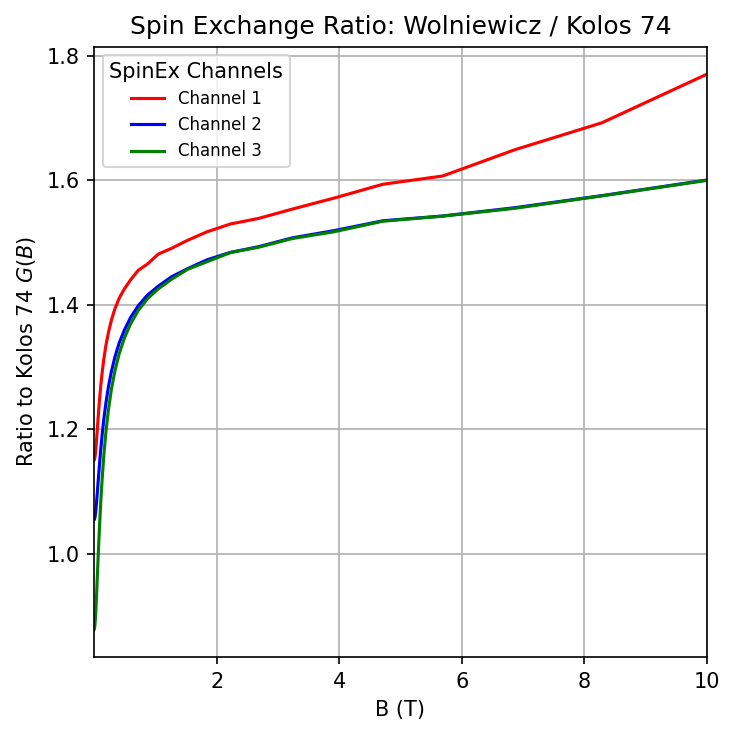


=== Jamieson / Kolos 74 ===
Channel 1 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}): mean ratio = 1.6109
Channel 2 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}): mean ratio = 1.4427
Channel 3 ({'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}): mean ratio = 1.3032


/var/folders/zl/6mjpyqs158s3ql94pwj2jgd40000gn/T/ipykernel_48401/1589205879.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="SpinEx Channels", fontsize=8)


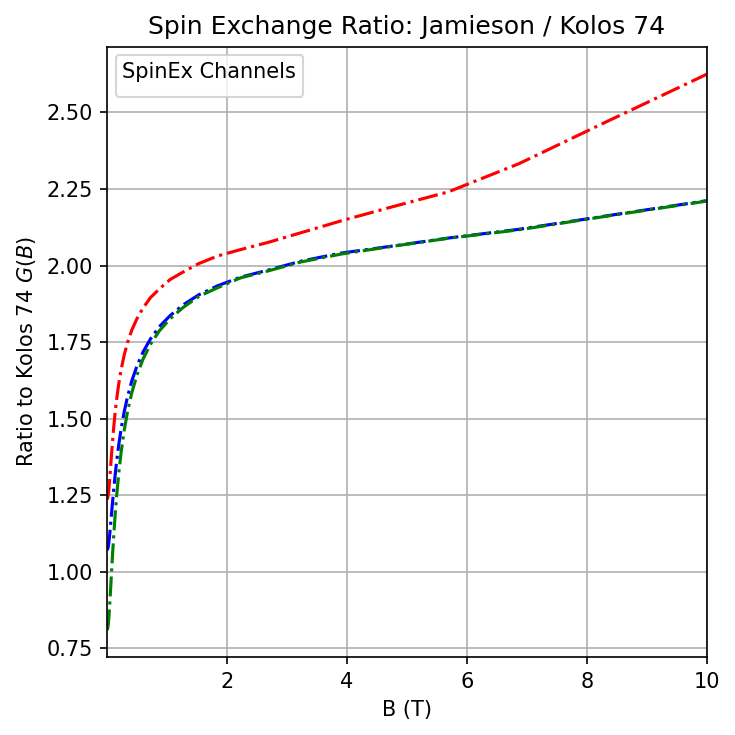

In [8]:
for pi, (pot_key, ch_map) in enumerate(G_factor_ratios_SESing.items()):
    print(f"\n=== {pot_key} / {base_key} ===")
    plt.figure(figsize=(5, 5), dpi=150)
    for ci, c in enumerate(SpinExChannels):
        channel_str = str(c)
        ratios = ch_map[channel_str]

        # print mean of this channel’s ratio
        mean_ratio = np.mean(ratios)
        print(f"Channel {ci+1} ({channel_str}): mean ratio = {mean_ratio:.4f}")

        label = f"Channel {ci+1}" if pi == 0 else None
        plt.plot(
            B_values,
            ratios,
            linetypes[pi % len(linetypes)],
            color=colors[ci % len(colors)],
            label=label
        )

    plt.xlabel("B (T)")
    plt.xlim(0.001, 10)
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Spin Exchange Ratio: {pot_key} / {base_key}")
    plt.grid(True, which='both')
    plt.legend(title="SpinEx Channels", fontsize=8)
    plt.tight_layout()
    plt.show()

In [ ]:
k_A  = np.linspace(1e-4, 4*constants.hcInEVAngstrom, 200)
k_eV = k_A / constants.hcInEVAngstrom

r0       = 1e-9
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos     = np.linspace(r0, intlimit, 100)

amuT = constants.TritiumConstants.mu + constants.meeV/2

def total_sigma_for_potential(pot_obj, k_grid_A, rhos, mu, integrator='Radau'):
    sigma_total = np.zeros_like(k_grid_A, dtype=float)
    for l in even_ls:
        sigma_l = np.array([
            elastic.GetCrossSection(rhos, k, l, mu, pot_obj, integrator)
            for k in k_grid_A
        ])
        sigma_total += sigma_l
    return sigma_total

sigmaT_raw_atomic = total_sigma_for_potential(potentials.Triplets["Silvera"], k_A, rhos, amuT)

In [ ]:
ratio_mu = sigmaT_raw_atomic / sigmaT_raw["Silvera"]

In [15]:
def get_perturbed_resultsDip(attr_name, delta):
    consts = constants.TritiumConstants()
    orig_val = getattr(consts, attr_name)
    setattr(consts, attr_name, orig_val + delta)
    results = {}
    for c in DipoleChannels:
        Gs = []
        for B in B_values:
            Gs.append(
                dipolelosses.GetGFactor(c, B, consts, T, potentials.Silvera_Triplet, rhos,
                    lin=0, lout=2))
        results[str(c)] = np.array(Gs)

    return results
attr_to_perturb = "nm"                 
delta_value = constants.meeV / 2      
G_perturbed = get_perturbed_resultsDip(attr_to_perturb, delta_value)

original = G_factors_rawDip["Silvera"]  

for channel_str, unperturbed in original.items():
    perturbed = G_perturbed[channel_str]
    rel_change = np.max(np.abs((perturbed - unperturbed) / unperturbed))
    print(f"{channel_str}: max |ΔG/G| = {rel_change:.3e}")

{'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'a'}: max |ΔG/G| = 1.890e-1
{'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'c'}: max |ΔG/G| = 3.662e-1
{'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'd'}: max |ΔG/G| = 3.689e-1
{'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'c'}: max |ΔG/G| = 9.677e-1
{'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'd'}: max |ΔG/G| = 2.229e+0



=== Perturbed vs Unperturbed (Dipole) ===
Channel {'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'a'}: mean ratio = 1.0448
Channel {'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'c'}: mean ratio = 0.8876
Channel {'alpha': 'd', 'beta': 'd', 'alphaprime': 'a', 'betaprime': 'd'}: mean ratio = 0.8688
Channel {'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'c'}: mean ratio = 0.7615
Channel {'alpha': 'd', 'beta': 'd', 'alphaprime': 'c', 'betaprime': 'd'}: mean ratio = 0.8964


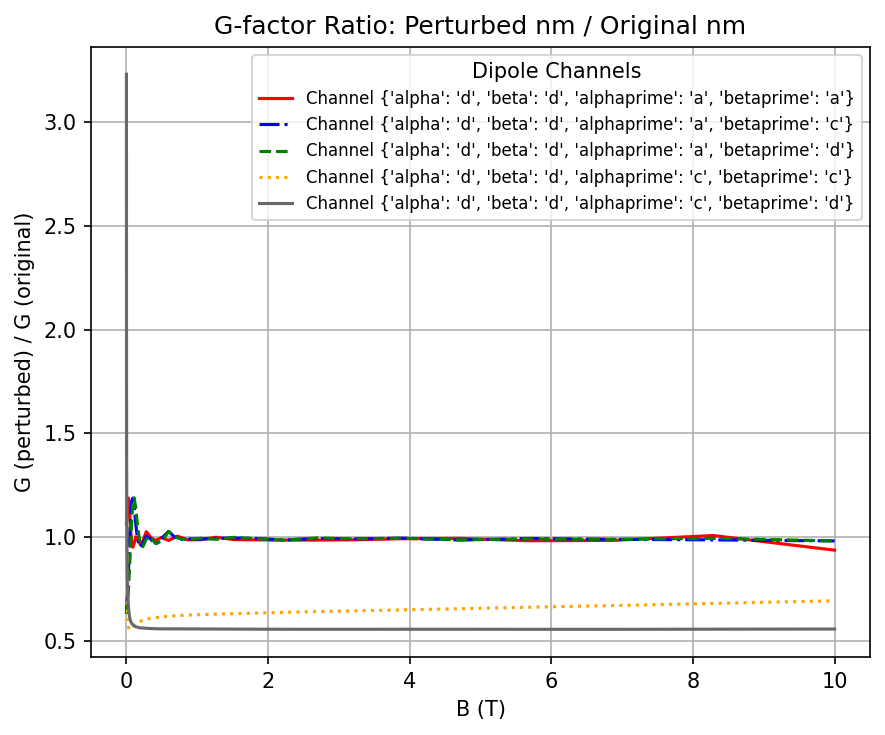

In [17]:
ratio_vs_unperturbed = {}

for channel_str in original.keys():
    unperturbed = original[channel_str]
    perturbed   = G_perturbed[channel_str]
    ratio       = perturbed / unperturbed
    ratio_vs_unperturbed[channel_str] = ratio

    mean_ratio = np.mean(ratio)
    print(f"Channel {channel_str}: mean ratio = {mean_ratio:.4f}")

plt.figure(figsize=(6, 5), dpi=150)
for i, (channel_str, ratio) in enumerate(ratio_vs_unperturbed.items()):
    plt.plot(
        B_values, ratio,
        label=f"Channel {channel_str}",
        linestyle=linetypes[i % len(linetypes)],
        color=colors[i % len(colors)]
    )

plt.xlabel("B (T)")
plt.ylabel("G (perturbed) / G (original)")
plt.title("G-factor Ratio: Perturbed nm / Original nm")
plt.grid(True, which="both")
plt.legend(title="Dipole Channels", fontsize=8)
plt.tight_layout()
plt.show()


In [22]:
def get_perturbed_resultsEx(attr_name, delta):
    consts = constants.TritiumConstants()
    orig_val = getattr(consts, attr_name)
    setattr(consts, attr_name, orig_val + delta)
    results = {}
    for c in SpinExChannels:
        Gs = []
        for B in B_values:
            Gs.append(spinexchange.GetGFactor(
                c, B, consts, T,
                potentials.Silvera_Triplet,
                potentials.Kolos_Singlet2_VDW, rhos))
        results[str(c)] = np.array(Gs)

    return results

attr_to_perturb = "nm"                 
delta_value = constants.meeV / 2      
G_perturbedEx = get_perturbed_resultsEx(attr_to_perturb, delta_value)

In [23]:
original = G_factors_raw_SETrip["Silvera"]  

for channel_str, unperturbed in original.items():
    perturbed = G_perturbed[channel_str]
    rel_change = np.max(np.abs((perturbed - unperturbed) / unperturbed))
    print(f"{channel_str}: max |ΔG/G| = {rel_change:.3e}")

{'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}: max |ΔG/G| = 7.971e-3
{'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}: max |ΔG/G| = 2.787e-3
{'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}: max |ΔG/G| = 2.656e-3


Channel {'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'a'}: mean ratio = 0.9999
Channel {'alpha': 'c', 'beta': 'c', 'alphaprime': 'a', 'betaprime': 'c'}: mean ratio = 0.9999
Channel {'alpha': 'c', 'beta': 'c', 'alphaprime': 'b', 'betaprime': 'd'}: mean ratio = 0.9998


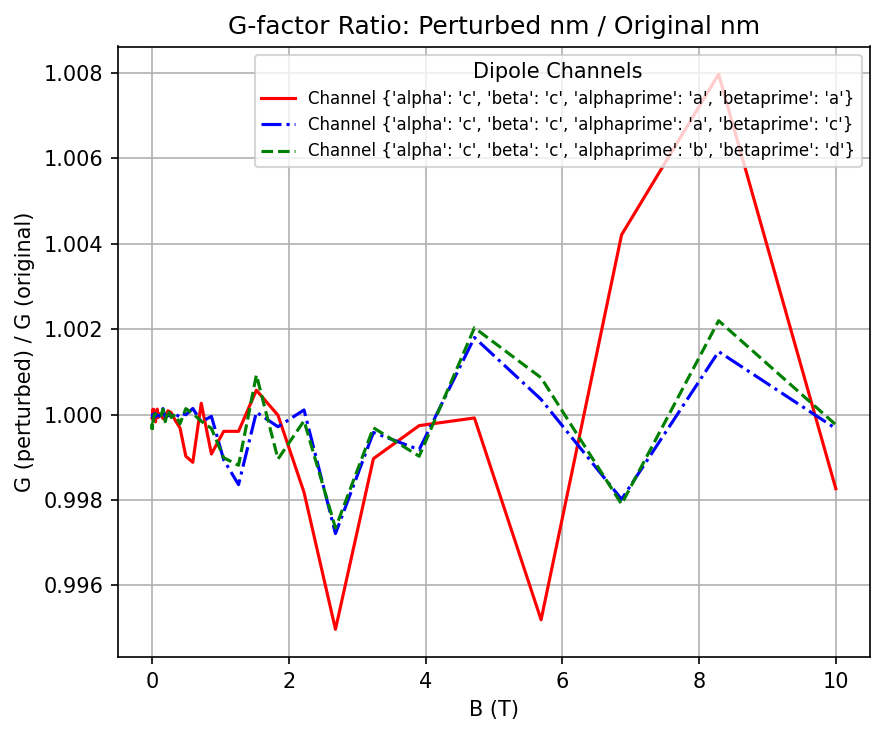

In [24]:
ratio_vs_unperturbed = {}

for channel_str in original.keys():
    unperturbed = original[channel_str]
    perturbed   = G_perturbed[channel_str]
    ratio       = perturbed / unperturbed
    ratio_vs_unperturbed[channel_str] = ratio

    mean_ratio = np.mean(ratio)
    print(f"Channel {channel_str}: mean ratio = {mean_ratio:.4f}")

plt.figure(figsize=(6, 5), dpi=150)
for i, (channel_str, ratio) in enumerate(ratio_vs_unperturbed.items()):
    plt.plot(
        B_values, ratio,
        label=f"Channel {channel_str}",
        linestyle=linetypes[i % len(linetypes)],
        color=colors[i % len(colors)]
    )

plt.xlabel("B (T)")
plt.ylabel("G (perturbed) / G (original)")
plt.title("G-factor Ratio: Perturbed nm / Original nm")
plt.grid(True, which="both")
plt.legend(title="Dipole Channels", fontsize=8)
plt.tight_layout()
plt.show()